In [1]:
import pandas as pd #load and manipulate data and for one-hot encoding
import numpy as np # calculate the mean and standard deviation
import graphviz #graphviz
from sklearn.model_selection import train_test_split #split data into training and testing
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn. metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
#데이터 다운로드
df = pd.read_excel(r'C:\Users\Hon Kim\Desktop\관광통계\2019년_국민여행조사_원자료\dfr.xlsx', index = True) #불필요한 열 삭제


#일부 데이터 정수형변환
df['JEJU']=df['JEJU'].astype(int)
df['KYUNG_S']=df['KYUNG_S'].astype(int)
df['KYUNG_N']=df['KYUNG_N'].astype(int)
df['JEON_S']=df['JEON_S'].astype(int)
df['JEON_N']=df['JEON_N'].astype(int)
df['CHOONG_S']=df['CHOONG_S'].astype(int)
df['CHOONG_N']=df['CHOONG_N'].astype(int)
df['GANGWON']=df['GANGWON'].astype(int)
df['KYUNGGI']=df['KYUNGGI'].astype(int)
df['SEJONG']=df['SEJONG'].astype(int)
df['ULSAN']=df['ULSAN'].astype(int)
df['DAEJEON']=df['DAEJEON'].astype(int)
df['GWANGJU']=df['GWANGJU'].astype(int)
df['INCHEON']=df['INCHEON'].astype(int)
df['DAEGU']=df['DAEGU'].astype(int)
df['BUSAN']=df['BUSAN'].astype(int)
df['SEOUL']=df['SEOUL'].astype(int)

#데이터 구성요소확인
df['pre_food'].unique()

#결측치 처리
df=df.fillna(0)

#결측치 처리 확인(multi-hot encoding)
df['pre_food'].unique()


array([0., 2.])

In [3]:
df.drop(['ID'],axis=1,inplace=True)

In [4]:
df

,visit_count,visit_acq,stay,COST,NUM,per_COST,cost_ski_watering,cost_camping,cost_hiking,cost_fishing,...,earn_self_classify_7,BMAR_1,BMAR_2,BMAR_3,BMAR_4,BMAR_5,winter,spring,summer,autumn
0,4,1,1,100000.0,1,100000.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
1,3,1,1,250000.0,1,250000.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
2,3,1,0,50001.0,3,16667.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
3,3,1,1,120000.0,1,120000.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
4,2,1,2,350001.0,3,116667.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10498,1,2,1,250000.0,2,125000.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
10499,1,2,0,100000.0,1,100000.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0
10500,1,2,0,150000.0,2,75000.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0
10501,1,2,2,249999.0,3,83333.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0


In [5]:
#만족도, 재방문률, 추천정도 변수를 합쳐
#타겟변수설정
point = df['Satify']+df['revisit']+df['recommend']

#point2 = point >= 15
#(point2.values==True).sum()

#point2 = point >= 14
#(point2.values==True).sum()

#point2 = point >= 13
#(point2.values==True).sum()

point2 = point >= 12
(point2.values==True).sum()

#point2 = point >= 11
#(point2.values==True).sum()

#point2 = point >= 10
#(point2.values==True).sum()

7852

In [6]:
#데이터 프레임 상 타겟변수 제거
df.drop(['Satify'],axis=1,inplace=True)
df.drop(['revisit'],axis=1,inplace=True)
df.drop(['recommend'],axis=1,inplace=True)
df.head()

,visit_count,visit_acq,stay,COST,NUM,per_COST,cost_ski_watering,cost_camping,cost_hiking,cost_fishing,...,earn_self_classify_7,BMAR_1,BMAR_2,BMAR_3,BMAR_4,BMAR_5,winter,spring,summer,autumn
0,4,1,1,100000.0,1,100000.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
1,3,1,1,250000.0,1,250000.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
2,3,1,0,50001.0,3,16667.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
3,3,1,1,120000.0,1,120000.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
4,2,1,2,350001.0,3,116667.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(df, point2, test_size = 0.4, random_state = 20)

In [8]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (6301, 335)
Training Labels Shape: (6301,)
Testing Features Shape: (4202, 335)
Testing Labels Shape: (4202,)


In [9]:
# 트레인셋, 테스트셋 분할
X_train, X_test, y_train, y_test = train_test_split(df, point2, test_size = 0.4, random_state = 20)
# 모델 구성
rfc = RandomForestClassifier(n_estimators = 10, random_state = 30)
# 모델 학습
rfc.fit(X_train, y_train);

In [10]:
#train 데이터에 대한 예측치 만들기
y_pred = rfc.predict(X_train)
predictions = [round(value) for value in y_pred]
#예측치 평가
accuracy = accuracy_score(y_train, predictions)
print("train Accuracy: %.2f%%" % (accuracy * 100.0))

#test 데이터에 대한 예측치 만들기
y_pred = rfc.predict(X_test)
predictions = [round(value) for value in y_pred]
#예측치 평가
accuracy = accuracy_score(y_test, predictions)
print("test Accuracy: %.2f%%" % (accuracy * 100.0))

train Accuracy: 99.29%
test Accuracy: 87.51%


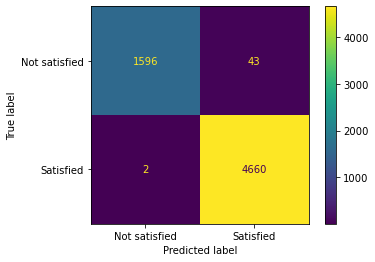

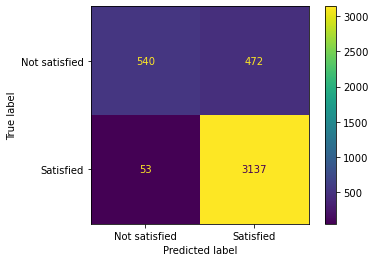

In [52]:
#훈련 모델 시각화(by.confusion matrix)
plot_confusion_matrix(rfc,
                     X_train,
                     y_train,
                     values_format='d',
                     display_labels=["Not satisfied", "Satisfied"])
#테스트모델 시각화(by.confusion matrix)
plot_confusion_matrix(rfc,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=["Not satisfied", "Satisfied"])

In [56]:
feature_list = list(df.columns)
feature_imp = pd.Series(rfc.feature_importances_,index = feature_list).sort_values(ascending=False)

In [57]:
print(feature_imp)

food_normal                  0.139297
transp_cost                  0.060313
companion_num                0.051837
food_cost                    0.049812
total_cost                   0.046648
                               ...   
edu_level_7                  0.000000
edu_level_8                  0.000000
marriage_5                   0.000000
householder_edu_level_1.0    0.000000
VAC_2.0                      0.000000
Length: 335, dtype: float64


In [42]:
# Instantiate model with 1000 decision trees
rfr = RandomForestRegressor(n_estimators = 10, random_state = 30)
# Train the model on training data
rfr.fit(train_features, train_labels);

In [43]:
prediction_test = rfr.predict(test_features)
print(prediction_test)


[0.9 0.9 0.9 ... 0.9 0.8 0.9]


In [33]:
prediction_test = rfr.predict(test_features)
print(prediction_test)

print("Accuracy = ", accuracy_score(test_labels, test_features))

[0.86 0.94 0.86 ... 0.94 0.78 0.66]


ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [21]:
# Use the forest's predict method on the test data
predictions = rfc.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(numpy.mean(errors), 2), 'degrees.')


Mean Absolute Error: 0.21 degrees.


In [23]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
numpy.mean(mape.dropna())
accuracy = 100 - numpy.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: -inf %.


In [25]:
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [26]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 0.21 degrees.


In [37]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
np.mean(mape.dropna())
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: -inf %.


In [40]:
mape.sum()

inf

In [15]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
feature_list = list(df.columns)
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

"dot" with args ['-Tpng', 'C:\\Users\\HONKIM~1\\AppData\\Local\\Temp\\tmpyc42brl8'] returned code: 1

stdout, stderr:
 b''
b"'C:\\Users\\Hon'\xc0\xba(\xb4\xc2) \xb3\xbb\xba\xce \xb6\xc7\xb4\xc2 \xbf\xdc\xba\xce \xb8\xed\xb7\xc9, \xbd\xc7\xc7\xe0\xc7\xd2 \xbc\xf6 \xc0\xd6\xb4\xc2 \xc7\xc1\xb7\xce\xb1\xd7\xb7\xa5, \xb6\xc7\xb4\xc2\r\n\xb9\xe8\xc4\xa1 \xc6\xc4\xc0\xcf\xc0\xcc \xbe\xc6\xb4\xd5\xb4\xcf\xb4\xd9.\r\n"



AssertionError: 1